<center> <h1> <span style="color:black"> IA|BE Data Science Certificate - Module 3 - Computer lab 4  </h1> </center> 
<center> <h2> <span style="color:red"> Fairness and discrimination-free insurance pricing </h1> </center>

# Agenda

* [Chapter 1 - Introduction](#one)
  + [1.1 Bias, discrimination and fairness](#one-one)
    + [1.1.1 Bias](#one-one-one)
    + [1.1.2 Discrimination](#one-one-two)
    + [1.1.3 Fairness](#one-one-three)
  + [1.2 Problem definition and mitigation](#one-two)
  + [1.3 Insurance pricing as in Lindholm et al. (2022)](#one-three)
* [Chapter 2 - Toy example](#two)
  + [2.1 Best-estimate prices](#two-one)
    + [2.1.1 Best-estimate prices: male + non-smoker](#two-one-one)
    + [2.1.2 Best-estimate prices: male + smoker](#two-one-two)
    + [2.1.3 Best-estimate prices: female + non-smoker](#two-one-three)
    + [2.1.4 Best-estimate prices: female + smoker](#two-one-four)
    + [2.1.5 Plot best-estimate prices: smoker vs non-smoker](#two-one-five)
  + [2.2 Unawareness prices](#two-two)
    + [2.2.1 Unawareness prices: smoker](#two-two-one)
    + [2.2.2 Unawareness prices: non-smoker](#two-two-two)
  + [2.3 Discrimination-free prices](#two-three)
    + [2.3.1 Discrimination-free prices: smoker](#two-three-one)
    + [2.3.2 Discrimination-free prices: non-smoker](#two-three-two)
  + [2.4 Plot all technical prices](#two-four)
    + [2.4.1 What happens to unawareness prices if we change $P(D=female|X_{2}=smoker)$?](#two-four-one)
* [Chapter 3 - A more complicated example - simulating a portfolio of policyholders](#three)
  + [3.1 Data generation](#three-one)
  + [3.2 Fitting a Poisson GLM to individual claim types](#three-two)
  + [3.3 Estimation of technical prices](#three-three)
  + [3.4 Aggregate results and plots](#three-four)
* [Chapter 4 - Conclusions](#four)

In this computer lab we will closely follow the methodology introduced by **Lindholm et al.** in their recent ASTIN Bulletin paper ["Discrimination-Free Insurance Pricing"](https://www.cambridge.org/core/journals/astin-bulletin-journal-of-the-iaa/article/discriminationfree-insurance-pricing/ED25C4053690E56050F437B8DF2AD117) to calculate discrimination-free insurance prices. In fact, in chapter 2 and 3 of this document, we will replicate the main results obtained in the paper, both on a toy example and on a simulated health insurance portfolio.

# Chapter 1 - Introduction <a name="one"></a>

## 1.1 Bias, discrimination and fairness <a name="one-one"></a>

In the last few years, we witnessed an increasing focus on ethics and fairness when using statistical learning/machine learning models. Various definitions of bias, discrimination and fairness have been proposed in the machine learning literature, see [Mehrabi et al., (2019)](https://dl.acm.org/doi/abs/10.1145/3457607) for a comprehensive list. As several of the proposed definitions are conflicting between each other, researchers are working to find a consensum on which definitions are relevant for specific fields. As discussed in [Xin and Huang, (2021)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3850420), we present some of the most relevant definitions applicable in insurance pricing. Further details about the definitions that we are going to introduce can be found in [Mehrabi et al., (2019)](https://dl.acm.org/doi/abs/10.1145/3457607).

### 1.1.1 Bias <a name="one-one-one"></a>

Bias and fairness are two sides of the same coin. Bias can exist in many shapes and forms, some of which can lead to unfairness:

* **from data to algorithm:** bias might be learnt from data by machine learning training algorithms, which results in biased outcome. E.g., *measurement bias* that arises from how we choose, utilize and measure particular features. COMPAS recedivism risk prediction tool is a popular example, where riskiness of a subject is measured by prior arrests and family arrests, resulting into biased outcomes towards the black community. However, this is partly due to the fact that more cases are filed for minority communities as they are more often controlled by the police

* **from algorithm to user:** any bias in the algorithms might introduce biases in user behaviour, e.g., *algorithmic bias* is when the bias is not present in the input data and is added purely by the algorithm. This might arise from algorithmic design choices, e.g., by applying regression model on a non-stratified subset of the data, choice of the loss function, ...)

* **from user to data:** users behavior/cultural background might affect the data that they generate, e.g., *historical bias* is the already existing bias and socio-technical issues in the world, e.g., a 2018 Google image search result where searching for CEOs showed a few female profiles due to the fact that only 5% of Fortune 500 CEOs were female.

### 1.1.2 Discrimination <a name="one-one-two"></a>

We present some of the relevant notions of discrimination in insurance pricing:

* **statistical discrimination:** when people are treated differently, solely based on statistical evidence. As an example, young policyholders are charged more for car insurance than older, more experienced policyholders because it turns out that there is historical evidence that they are more likely to file claims. In insurance, statistical discrimination is only fully avoided if everyone is charged the same premium, regardless of individual characteristics

* **direct discrimination:** when protected characteristics of individuals explicitly result in different premiums. In particular, direct discrimination would occur when higher premiums are charged simply because protected characteristics of policyholders are not equal. An example would occur when a male and a female policyholder are charged different premiums, even though all of their other characteristics are equal

* **indirect discrimination:** after direct discrimination is avoided, indirect discrimination occurs when a policyholder is treated unfairly due to the inference of his protected characteristics via the seemingly neutral non-protected characteristics. Proxy discrimination is a well-known form of indirect discrimination and occurs when non-protected characteristics proxy for the dropped protected characteristic and "take over" their predictive power. As an example, assume that for some reason men more frequently smoke than women. If we exclude gender as a direct rating factor, but include smoking habits as a rating factor, smoking habits can proxy for the left out rating factor gender and (partly) take over its predictive power.

### 1.1.3 Fairness <a name="one-one-three"></a>

Most fairness criteria presented in machine learning literature are linked to classification problems. Some of them can be extended to regression problems and can be applied in insurance pricing:

* **demographic (or statistical) parity:** a pricing procedure satisfies demographic parity when each group of a protected feature receives the same price, ceteris paribus. Basically, the prediction should be statistically independent of the protected feature. Often, we refer to this definition as *group fairness*

* **fairness through awareness:** a pricing procedure is fair by this notion if similar individuals get similar prices, see [Dwork et al., (2012)](https://dl.acm.org/doi/10.1145/2090236.2090255). This type of fairness can also be called individual fairness as similar individuals should be treated similarly, see [Zemel et al., (2013)](https://proceedings.mlr.press/v28/zemel13.html). If the pricing procedure satisfies fairness through awareness, it can be directly discriminatory. For this notion all information that can be used should be used, which means also protected characteristics can explicitly be used in
the pricing function

* **fairness through unawareness:** a pricing procedure is fair by this notion if protected characteristics are not explicitly used in
the pricing function, see [Kusner et al., (2017)](https://dl.acm.org/doi/10.5555/3294996.3295162). If the pricing procedure satisfies fairness through unawareness, it avoids direct discrimination, but indirect discrimination can occur

* **fairness through immunized data:** a pricing procedure is fair by this notion if the protected characteristics are not explicitly
used, conform fairness through unawareness, and additionally the non-protected characteristics are pre-adjusted to be "immune" to the protected characteristics, see [Xin and Huang, (2021)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3850420). Fairness through immunized data can be seen as an extension of fairness through unawareness to overcome the possible proxy discrimination. If a pricing procedure satisfies fairness through immunized data, it avoids direct and indirect discrimination.

## 1.2 Problem definition and mitigation<a name="one-two"></a>

"Technology is neither good nor bad; nor is it neutral" [Kranzberg (1986)](https://www.jstor.org/stable/3105385). We often think that machines are free from the biases that typically affect humans. As illustrated in the paragraph above, learning algorithms might pick up particular forms of bias. Generally, the actuary/statistician aims to build a model that minimizes the loss function, which might result in models that discriminate against people with sensitive attributes, leading to unfairness. Therefore, fairness goals must be explicit and enforced in the learning process.

Models' pipelines contain three possible intervention points to mitigate unwanted bias: (1) via the training data, (2) via the learning procedure, and (3) via the resulting predictions. Therefore, we introduce three corresponding classes of mitigation methodologies:
* pre-processing, which consists of modifying the data that is translated into inputs for a training process (e.g., relabeling)
* in-processing, which takes place directly in the model trainin by adding an additional objective to the loss function, e.g., via a regularization term
* post-processing, which takes place after having fitted the model.

[Lindholm et al. (2022)](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/ED25C4053690E56050F437B8DF2AD117/S0515036121000234a.pdf/discrimination-free-insurance-pricing.pdf) present a *post-processing* methodology to arrive at discrimination-free insurance pricing.

<center><img src="https://github.com/loremarchi/discrimination_free_pricing_presentation/blob/main/imgs/1_approaches_to_fairness_modelling.png?raw=1"/><figcaption>Figure 1: Flowchart indicating the three alternative mitigation strategies. The dashed lines indicates pre-processing and in-processing techniques, referring to methods used before and during the modeling phase of the data, respectively. The solid line indicates a subgroup of methodologies adjusting the fitted values, hence after fitting the model. The method described in Lindholm et al. (2022) belongs to this latest subset. </figcaption></center>

## 1.3 Insurance pricing as in [Lindholm et al. (2022)](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/ED25C4053690E56050F437B8DF2AD117/S0515036121000234a.pdf/discrimination-free-insurance-pricing.pdf) <a name="one-three"></a>

In the actuarial context, technical pricing of insurance products via risk classification is an essential task. An accurate distinction between low and high-risk profiles is prominent in allocating actuarially fair premiums among policyholders. However, commercial tariff tables are subject to insurance regulations; in particular, insurance companies must comply with local regulations to preserve protected classes in society.

By *discrimination*, we refer to insurance prices that differentiate between policyholders on the basis of (legally) prohibited characteristics. Therefore, we assume that the insurer has access to both:
* protected (discriminatory) characteristics (e.g., gender, race, religious belief)
* unprotected (non-discriminatory) characteristics (e.g. age, smoking habits).

The **European Council (2004) COUNCIL DIRECTIVE 2004/113/EC** breaks down discrimination into two more specific subcategories:
  * direct discrimination, which takes place when a protected feature is used as a risk factor
  * indirect discrimination, which occurs when the model infers protected features from interactions with unprotected ones. *Redlining* is a popular example of **proxy discrimination**, describing an American phenomenon of the 1960s in which the geographical location was used as a proxy for race. The term *redlining* refers to charging higher insurance prices to specific neighborhoods, causing a selective increase for low-income neighborhoods where people from specific communities tend to gather.

We aim at developing insurance pricing formulas that are free from discrimination. Along the ideas proposed by [Lindholm et al. (2022)](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/ED25C4053690E56050F437B8DF2AD117/S0515036121000234a.pdf/discrimination-free-insurance-pricing.pdf), we build a pricing model that:
* avoids direct discrimination
* avoids indirect discrimination.
    

**Remark**: No specific fairness definition is in scope of the methodology introduced today.

# Chapter 2 - Toy example <a name="two"></a>

In this section, we are going to illustrate the framework proposed in [Lindholm et al. (2022)](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/ED25C4053690E56050F437B8DF2AD117/S0515036121000234a.pdf/discrimination-free-insurance-pricing.pdf) with a toy example.
* $Y = \sum_{j}{Y_{j}}$ is our target variable representing claim costs of a policyholder, each $Y_{j}$ represents the claim costs related to the $j-th$ claim type, where $j \in \{1,2,3\}$
* $\textbf{X} = (X_{1}, X_{2})$ are unprotected (non-discriminatory) covariates
  * $X_{1}\in \left \{ 15,...,80 \right \}$ is the age of a policyholder
  * $X_{2}\in \left \{ non-smoker, smoker \right \}$
* $D$ represents the **gender** of a policyholder, it is a protected (discriminatory) covariate
* we assume that smoking habits are gender related, hence we assume that the protected feature $D$ and the unprotected feature $X_{2}$ are correlated. Therefore, we assume that the following conditional probability holds: $P(D=female|X_{2}=smoker)=0.8$.

In [ ]:
# import main packages
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom

## 2.1 Best-estimate prices <a name="two-one"></a>

The **best-estimate price** is defined as:

$$\mu{(\textbf{X},D)} = \mathbb{E}\left[Y|\textbf{X},D\right].$$

$\mathbb{E}\left[Y|\textbf{X},D\right]$ is the regression of claim costs of a policyholder over all available covariates. It is the most accurate price that we can calculate because it leverages on the complete set of available information. Generally, the best-estimate price is not discrimination-free.

We present a health insurance example to demonstrate the approach of discrimination-free insurance pricing. We consider three different types of health costs: 
* birthing-related health costs only affect women between ages 20 and 40 (type 1)
* cancer-related health costs with a higher frequency for smokers and also for women (type 2)
* health costs due to other disabilities (type 3). 

For simplicity, we only model claim counts as we assume deterministic claim costs for the three different claim types. Furthermore, we assume that all individuals have unitary exposure and that independent Poisson GLMs describe the claim counts for the different claim types with the canonical (logarithmic) link function.

The three health risks are governed by the following log-frequencies:

* birth related health risk only affecting women between age 20 and 40 (type 1):

$$\log{\lambda_{1}(\textbf{X},D)}:=\alpha_{0}+\alpha_{1}1_{X_1\in[20,40]}1_{D=woman}$$

* cancer related health risk with higher frequency for smokers and women (type 2):

$$\log{\lambda_{2}(\textbf{X},D)}:=\beta_{0}+\beta_{1}X_{1}+\beta_{2}1_{X_2=smoker} + \beta_{3}1_{D=woman}$$

* health risk due to other disabilities (type 3):

$$\log{\lambda_{3}(\textbf{X},D)}:=\gamma_{0}+\gamma_{1}X_{1}.$$

The **best-estimate price**, taking all available covariates into consideration, is given by:

$$\mu{(\textbf{X},D)} = E\left[Y|X,D\right] = C_{1}\lambda_{1}(\textbf{X},D) + C_{2}\lambda_{2}(\textbf{X},D) + C_{3}\lambda_{3}(\textbf{X},D),$$

where $(C_{1},C_{2},C_{3})=(0.5,0.9,0.1)$ are the deterministic claim costs for the respective claim types. Clearly, the best-estimate price uses the protected feature $D$ as risk factor, hence it directly discriminates between genders. Moreover, in the Lindholm et al. (2022) toy example, the best-estimate prices are obtained using the following parametrization:
* $(\alpha_{0},\alpha_{1})=(-40,38.5)$
* $(\beta_{0},\beta_{1},\beta_{2},\beta_{3})=(-2,0.004,0.1,0.2)$
* $(\gamma_{0},\gamma_{1})=(-2,0.01)$.

In [ ]:
age_range = np.arange(start = 15, stop = 81, step = 1); age_range

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
       66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [ ]:
age_range.shape

(66,)

In [ ]:
pregnant_age_range = np.repeat(0,66)
pregnant_age_range[5:26] = 1 # mark categories
pregnant_age_range.shape
pregnant_age_range

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 2.1.1 Best-estimate prices: male + non-smoker <a name="two-one-one"></a>

In this section, we calculate the expected claim frequencies (across the three claim types) for male and non-smoker policyholders: 
* $\lambda_{1}(X_{1},X_{2} = ns,D = m)$ 
* $\lambda_{2}(X_{1},X_{2} = ns,D = m)$ 
* $\lambda_{3}(X_{1},X_{2} = ns,D = m)$. 

In [ ]:
type1_m_ns = np.exp(-40)
type2_m_ns = np.exp(-2 + 0.004*age_range)
type3_m_ns = np.exp(-2 + 0.01*age_range)

In [ ]:
print(type1_m_ns.shape, type2_m_ns.shape, type3_m_ns.shape)

() (66,) (66,)


Furthermore, the best-estimate price for male non-smoking subjects is given by summing together the (deterministic) claim costs times the expected frequency across claim types:

$$\mu{(X_{1},X_{2} = ns,D = m)} = C_{1}\lambda_{1}(X_{1},X_{2} = ns,D = m) + C_{2}\lambda_{2}(X_{1},X_{2} = ns,D = m) + C_{3}\lambda_{3}(X_{1},X_{2} = ns,D = m).$$

In [ ]:
best_est_m_ns = 0.5*type1_m_ns + 0.9*type2_m_ns + 0.1*type3_m_ns

In [ ]:
best_est_m_ns

array([0.14505727, 0.14573367, 0.14641373, 0.14709748, 0.14778495,
       0.14847615, 0.14917112, 0.14986988, 0.15057246, 0.15127887,
       0.15198915, 0.15270332, 0.15342141, 0.15414344, 0.15486945,
       0.15559945, 0.15633347, 0.15707155, 0.1578137 , 0.15855996,
       0.15931036, 0.16006492, 0.16082366, 0.16158663, 0.16235384,
       0.16312534, 0.16390113, 0.16468126, 0.16546576, 0.16625466,
       0.16704797, 0.16784575, 0.16864801, 0.16945478, 0.17026611,
       0.17108202, 0.17190253, 0.17272769, 0.17355753, 0.17439208,
       0.17523136, 0.17607542, 0.17692429, 0.177778  , 0.17863658,
       0.17950007, 0.18036851, 0.18124192, 0.18212035, 0.18300383,
       0.18389239, 0.18478607, 0.1856849 , 0.18658893, 0.18749819,
       0.18841271, 0.18933254, 0.19025771, 0.19118826, 0.19212423,
       0.19306565, 0.19401257, 0.19496503, 0.19592306, 0.1968867 ,
       0.197856  ])

### 2.1.2 Best-estimate prices: male + smoker <a name="two-one-two"></a>

In this section, we calculate the expected claim frequencies (across the three claim types) for male and smoker policyholders: 
* $\lambda_{1}(X_{1},X_{2} = s,D = m)$ 
* $\lambda_{2}(X_{1},X_{2} = s,D = m)$ 
* $\lambda_{3}(X_{1},X_{2} = s,D = m)$.

In [ ]:
type1_m_s = np.exp(-40)
type2_m_s = np.exp(-2 + 0.004*age_range + 0.1)
type3_m_s = np.exp(-2 + 0.01*age_range)

In [ ]:
print(type1_m_s.shape, type2_m_s.shape, type3_m_s.shape)

() (66,) (66,)


Furthermore, the best-estimate price for male smoking subjects is given by summing together the (deterministic) claim costs times the expected frequency across claim types:

$$\mu{(X_{1},X_{2} = s,D = m)} = C_{1}\lambda_{1}(X_{1},X_{2} = s,D = m) + C_{2}\lambda_{2}(X_{1},X_{2} = s,D = m) + C_{3}\lambda_{3}(X_{1},X_{2} = s,D = m).$$

In [ ]:
best_est_m_s = 0.5*type1_m_s + 0.9*type2_m_s + 0.1*type3_m_s

In [ ]:
best_est_m_s 

array([0.1586594 , 0.15939031, 0.16012511, 0.16086382, 0.16160646,
       0.16235306, 0.16310365, 0.16385825, 0.16461689, 0.1653796 ,
       0.16614639, 0.16691731, 0.16769237, 0.1684716 , 0.16925503,
       0.17004268, 0.1708346 , 0.17163079, 0.1724313 , 0.17323615,
       0.17404537, 0.17485898, 0.17567703, 0.17649953, 0.17732651,
       0.17815801, 0.17899406, 0.17983469, 0.18067992, 0.18152979,
       0.18238433, 0.18324357, 0.18410755, 0.18497629, 0.18584982,
       0.18672819, 0.18761141, 0.18849954, 0.18939259, 0.1902906 ,
       0.19119361, 0.19210164, 0.19301475, 0.19393294, 0.19485628,
       0.19578478, 0.19671848, 0.19765743, 0.19860165, 0.19955118,
       0.20050606, 0.20146633, 0.20243202, 0.20340317, 0.20437982,
       0.20536201, 0.20634977, 0.20734314, 0.20834217, 0.20934689,
       0.21035735, 0.21137357, 0.21239561, 0.2134235 , 0.21445729,
       0.21549701])

### 2.1.3 Best-estimate prices: female + non-smoker <a name="two-one-three"></a>

In this section, we calculate the expected claim frequencies (across the three claim types) for female and non-smoking policyholders: 
* $\lambda_{1}(X_{1},X_{2} = ns,D = f)$ 
* $\lambda_{2}(X_{1},X_{2} = ns,D = f)$ 
* $\lambda_{3}(X_{1},X_{2} = ns,D = f).$ 

In [ ]:
type1_f_ns = np.exp(-40 + 38.5*pregnant_age_range)
type2_f_ns = np.exp(-2 + 0.004*age_range + 0.2)
type3_f_ns = np.exp(-2 + 0.01*age_range)

In [ ]:
print(type1_f_ns.shape, type2_f_ns.shape, type3_f_ns.shape)

(66,) (66,) (66,)


Furthermore, the best-estimate price for female non-smoking subjects is given by summing together the (deterministic) claim costs times the expected frequency across claim types:

$$\mu{(X_{1},X_{2} = ns,D = f)} = C_{1}\lambda_{1}(X_{1},X_{2} = ns,D = f) + C_{2}\lambda_{2}(X_{1},X_{2} = ns,D = f) + C_{3}\lambda_{3}(X_{1},X_{2} = ns,D = f).$$

In [ ]:
best_est_f_ns = 0.5*type1_f_ns + 0.9*type2_f_ns + 0.1*type3_f_ns

In [ ]:
best_est_f_ns

array([0.17369208, 0.17448324, 0.17527853, 0.17607798, 0.1768816 ,
       0.2892545 , 0.29006656, 0.29088288, 0.29170348, 0.29252839,
       0.29335765, 0.29419127, 0.29502929, 0.29587173, 0.29671863,
       0.29757001, 0.2984259 , 0.29928633, 0.30015133, 0.30102093,
       0.30189515, 0.30277404, 0.30365761, 0.3045459 , 0.30543895,
       0.30633677, 0.19567433, 0.19658181, 0.19749416, 0.19841142,
       0.19933363, 0.2002608 , 0.20119298, 0.2021302 , 0.20307249,
       0.20401988, 0.20497241, 0.20593012, 0.20689303, 0.20786119,
       0.20883462, 0.20981336, 0.21079745, 0.21178692, 0.21278181,
       0.21378216, 0.214788  , 0.21579937, 0.2168163 , 0.21783884,
       0.21886702, 0.21990088, 0.22094045, 0.22198579, 0.22303691,
       0.22409388, 0.22515672, 0.22622547, 0.22730018, 0.22838088,
       0.22946762, 0.23056044, 0.23165938, 0.23276448, 0.23387579,
       0.23499334])

### 2.1.4 Best-estimate prices: female + smoker <a name="two-one-four"></a>

In this section, we calculate the expected claim frequencies (across the three claim types) for female and smoking policyholders: 
* $\lambda_{1}(X_{1},X_{2} = s,D = f)$ 
* $\lambda_{2}(X_{1},X_{2} = s,D = f)$ 
* $\lambda_{3}(X_{1},X_{2} = s,D = f).$ 

In [ ]:
type1_f_s = np.exp(-40 + 38.5*pregnant_age_range)
type2_f_s = np.exp(-2 + 0.004*age_range + 0.1 + 0.2)
type3_f_s = np.exp(-2 + 0.01*age_range)

In [ ]:
print(type1_f_s.shape, type2_f_s.shape, type3_f_s.shape)

(66,) (66,) (66,)


Furthermore, the best-estimate price for female smoking subjects is given by summing together the (deterministic) claim costs times the expected frequency across claim types:

$$\mu{(X_{1},X_{2} = s,D = f)} = C_{1}\lambda_{1}(X_{1},X_{2} = s,D = f) + C_{2}\lambda_{2}(X_{1},X_{2} = s,D = f) + C_{3}\lambda_{3}(X_{1},X_{2} = s,D = f).$$

In [ ]:
best_est_f_s = 0.5*type1_f_s + 0.9*type2_f_s + 0.1*type3_f_s

In [ ]:
best_est_f_s

array([0.19030575, 0.19116351, 0.19202565, 0.19289222, 0.19376323,
       0.3062038 , 0.30708379, 0.30796831, 0.30885739, 0.30975106,
       0.31064934, 0.31155227, 0.31245987, 0.31337218, 0.31428922,
       0.31521102, 0.31613762, 0.31706903, 0.31800531, 0.31894646,
       0.31989254, 0.32084355, 0.32179955, 0.32276056, 0.3237266 ,
       0.32469772, 0.21410887, 0.21509024, 0.21607677, 0.21706852,
       0.2180655 , 0.21906775, 0.22007531, 0.2210882 , 0.22210648,
       0.22313016, 0.22415929, 0.22519389, 0.22623402, 0.22727969,
       0.22833095, 0.22938783, 0.23045038, 0.23151862, 0.23259259,
       0.23367234, 0.2347579 , 0.23584931, 0.2369466 , 0.23804982,
       0.23915901, 0.2402742 , 0.24139543, 0.24252275, 0.24365619,
       0.24479579, 0.24594161, 0.24709367, 0.24825201, 0.24941669,
       0.25058775, 0.25176522, 0.25294914, 0.25413958, 0.25533655,
       0.25654012])

### 2.1.5 Plot best-estimate prices: smoker vs non-smoker <a name="two-one-five"></a>

In [ ]:
data_preproc_best_ns = pd.DataFrame({
    'age': age_range, 
    'best-estimate price non-smoking men': best_est_m_ns,
    'best-estimate price non-smoking women': best_est_f_ns})

data_preproc_best_s = pd.DataFrame({
    'age': age_range,
    'best-estimate price smoking men': best_est_m_s,
    'best_estimate price smoking women': best_est_f_s})

[(0.13, 0.33)]

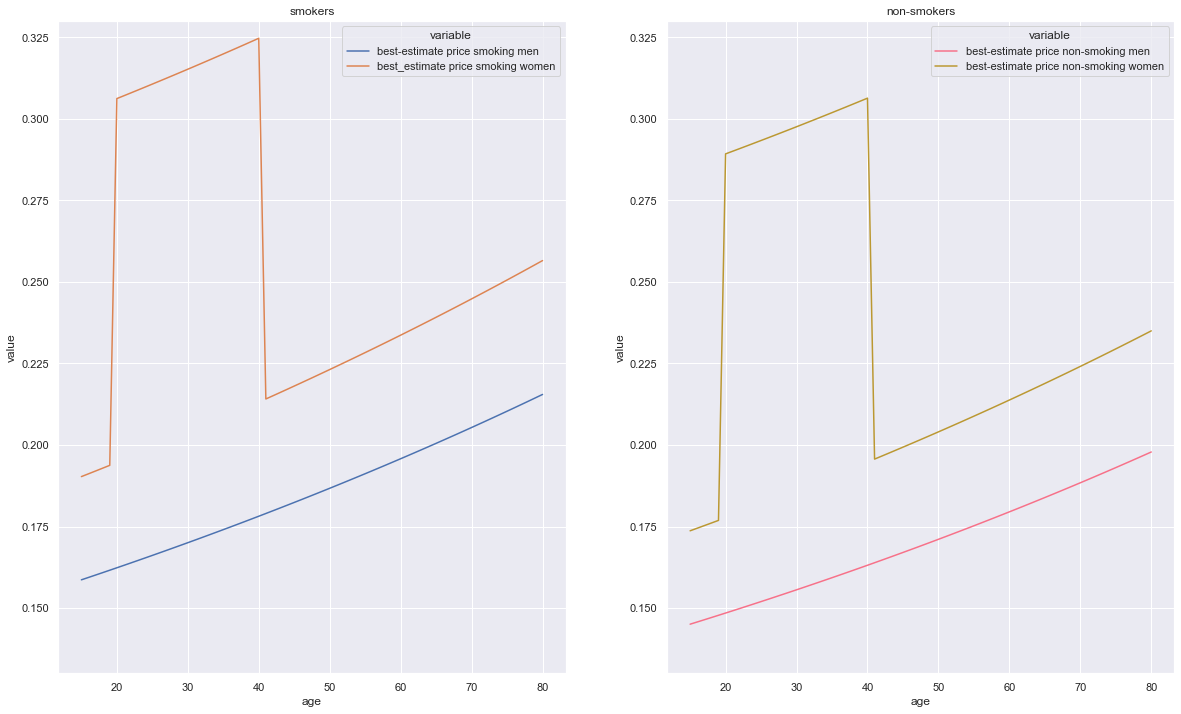

In [ ]:
%matplotlib inline

sns.set(rc={'figure.figsize':(20,12)})

f, axes = plt.subplots(1, 2)

plot_1 = sns.lineplot(x='age', y='value', hue='variable', 
             data=pd.melt(data_preproc_best_s, ['age']), ax = axes[0])
plot_1.set_title('smokers')
plot_1.set(ylim=(0.13, 0.33))

sns.set_palette("husl")
plot_2 = sns.lineplot(x='age', y='value', hue='variable', 
             data=pd.melt(data_preproc_best_ns, ['age']), ax = axes[1])
plot_2.set_title('non-smokers')
plot_2.set(ylim=(0.13, 0.33))

The plot shows the best-estimate prices for all the risk profiles in our portfolio. As we would expect, they discriminate between genders, with the best-estimate price for a female policyholder being higher than the price for a male subject (ceteris paribus). 

## 2.2 Unawareness prices <a name="two-two"></a>

A first attempt to calculate discrimination-free prices would be fitting a regression model without using any of the protected features as risk factors. Therefore, the **unawareness price** is defined as:

$$\mu{(\textbf{X})} = \mathbb{E}\left[Y|\textbf{X}\right].$$

As this price does not explicitly depend on the protected features $D$, it avoids direct discrimination. However, although direct discrimination is avoided, the unawareness price might still be subject to **indirect discrimination** (by proxies). We can derive the unawareness prices by dropping the protected feature $D$ from the best-estimate prices:

$$\mu(\textbf{X})= \mathbb{E}[Y|\textbf{X}] = \sum_{d}\mathbb{E}[Y|\textbf{X},D=d] \cdot P(D=d|\textbf{X}).$$

The unawareness prices require additional information about the following conditional probabilities:

$$P(D=d|\textbf{X} = \textbf{x}) = \frac{P(D=d,\textbf{X} = \textbf{x})}{P(\textbf{X}=\textbf{x})}.$$


After the exclusion of the protected feature, the conditional probability enables inference of the protected feature $D$ from the unprotected features $\textbf{X}$ that remain in the model. The only way the unawareness price does avoid indirect discrimination is when $\textbf{X}$ and $D$ are independent. This would mean that there is no way to infer information about the protected features from the unprotected ones. It then holds that $P(D=d|\textbf{X}) = P(D=d)$. 

An intuitive interpretation for the above arises from econometrics theory. The **omitted variable bias** arises when the features included in the model $\textbf{X}$ are correlated with the omitted features $\textbf{Z}$. Let's assume that the true model for the response $Y$ is described by the following equation, where $\textbf{X}$ and $\textbf{Z}$ are two sets of unprotected and protected features, respectively. Moreover, we assume that $\mathbb{E}[\epsilon|\textbf{X},\textbf{Z}] = 0$ and $Cov(\textbf{X},\textbf{Z}) \neq 0$:

$$Y=\textbf{X}\beta + \textbf{Z}\gamma + \epsilon$$

We fit a (linear) model uniquely including the unprotected features $\textbf{X}$. That is: we reason along the unawareness pricing principle:

$$Y=\textbf{X}\beta + \nu$$

The OLS estimator of $\beta$ is:

$$\hat{\beta} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}Y = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}[\textbf{X}\beta + \textbf{Z}\gamma + \epsilon] = \beta + (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{Z}\gamma + (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\epsilon $$

The expectation of $\hat{\beta}$ conditional on $\textbf{X}$ is:

$$\mathbb{E}[\hat{\beta}|\textbf{X}] = \beta + (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{Z}\gamma + 0$$

We observe that the conditional expectation of $\hat{\beta}$ given $\textbf{X}$ is not centered on the actual value of $\beta$, and therefore is biased. The included variables $\textbf{X}$ will partially proxy for
the omitted characteristics $\textbf{Z}$ and the estimated impact of the included variables will be
biased. This is not true in two cases:
* $\gamma = 0$, which means that the coefficients related to the protected variables would be zero. Therefore, the protected features $\textbf{Z}$ do not have any explanatory power with respect to $Y$
* $\textbf{X}^{T}\textbf{Z} = 0$, which means that unprotected and protected features are not correlated.

### 2.2.1 Unawareness prices: smoker <a name="two-two-one"></a>

Recalling that we defined $X_{1}$ (age), $X_{2}$ (smoking habits) as unprotected features, and $D$ (gender) as protected feature, we can consider the following conditional probability: 

$$P(D=d|\textbf{X}) = \frac{P(D=d,\textbf{X=x})}{P(\textbf{X=x})} = \frac{P(D=d,X_{1}=x_{1},X_{2}=x_{2})}{P(X_{1}=x_{1},X_{2}=x_{2})}.$$

Assuming that $X_{1} \perp (X_{2},D)$, we have:
$$P(D=d|\textbf{X}) = \frac{P(D=d,X_{2}=x_{2})\cdot P(X_{1}=x_{1})}{P(X_{1}=x_{1})\cdot P(X_{2}=x_{2})} = \frac{P(D=d,X_{2} = x_{2})}{P(X_{2} = x_{2})} = P(D=d|X_{2}).$$

Moreover, we assume that relevant probabilities are assigned the following values:
* $P(D=female)=0.45$
* $P(X_{2}=smoker)=0.3$
* $P(D=female|X_{2}=smoker)=0.8.$

In this section, we want to drop the protected feature $D$ (gender) from the calculations. The **unawareness price** for a policyholder **with smoking habits** is defined as: 

$$\mu_{s}(\textbf{X})=\sum_{d\in{male,female}}[C_{1}\lambda_{1}(X_{1},X_{2}=s,d)+C_{2}\lambda_{2}(X_{1},X_{2}=s,d)+C_{3}\lambda_{3}(X_{1},X_{2}=s,d)]\cdot P(D=d|X_{2}=s).$$

In [ ]:
smoker_prob = 0.3
female_smoker_prob = 0.8
female_prob = 0.45
male_prob = 1-female_prob
female_nonsmoker_prob = (female_prob - female_smoker_prob * smoker_prob) / (1 - smoker_prob)

In [ ]:
print(f'female given smoker {female_smoker_prob}, female given nonsmoker {female_nonsmoker_prob}')

female given smoker 0.8, female given nonsmoker 0.30000000000000004


In [ ]:
type1_unaware_s = type1_f_s*female_smoker_prob + type1_m_s*(1-female_smoker_prob)
type2_unaware_s = type2_f_s*female_smoker_prob + type2_m_s*(1-female_smoker_prob)
type3_unaware_s = type3_f_s*female_smoker_prob + type3_m_s*(1-female_smoker_prob)

In [ ]:
unawareness_price_s = 0.5*type1_unaware_s + 0.9*type2_unaware_s + 0.1*type3_unaware_s

In [ ]:
unawareness_price_s

array([0.18397648, 0.18480887, 0.18564554, 0.18648654, 0.18733188,
       0.27743365, 0.27828776, 0.2791463 , 0.28000929, 0.28087677,
       0.28174875, 0.28262528, 0.28350637, 0.28439206, 0.28528238,
       0.28617735, 0.28707701, 0.28798139, 0.28889051, 0.2898044 ,
       0.2907231 , 0.29164664, 0.29257504, 0.29350835, 0.29444658,
       0.29538978, 0.20708591, 0.20803913, 0.2089974 , 0.20996077,
       0.21092926, 0.21190291, 0.21288175, 0.21386582, 0.21485515,
       0.21584977, 0.21684971, 0.21785502, 0.21886573, 0.21988187,
       0.22090348, 0.22193059, 0.22296325, 0.22400148, 0.22504533,
       0.22609483, 0.22715002, 0.22821093, 0.22927761, 0.2303501 ,
       0.23142842, 0.23251262, 0.23360275, 0.23469883, 0.23580092,
       0.23690904, 0.23802324, 0.23914356, 0.24027005, 0.24140273,
       0.24254167, 0.24368689, 0.24483844, 0.24599636, 0.2471607 ,
       0.2483315 ])

### 2.2.2 Unawareness prices: non-smoker <a name="two-two-two"></a>

Recalling that we defined $X_{1}$ (age), $X_{2}$ (smoking habits) as unprotected features, and $D$ (gender) as protected feature, we can consider the following conditional probability: 

$$P(D=d|\textbf{X}) = \frac{P(D=d,\textbf{X=x})}{P(\textbf{X=x})} = \frac{P(D=d,X_{1}=x_{1},X_{2}=x_{2})}{P(X_{1}=x_{1},X_{2}=x_{2})}.$$

We assume that $X_{1} \perp (X_{2},D):$
$$P(D=d|\textbf{X}) = \frac{P(D=d,\textbf{X=x})}{P(\textbf{X=x})} = \frac{P(D=d,X_{2} = x_{2})}{P(X_{2} = x_{2})} = P(D=d|X_{2}).$$

Moreover, we assume that relevant probabilities are assigned the following values:
* $P(D=female)=0.45$
* $P(X_{2}=smoker)=0.3$
* $P(D=female|X_{2}=non-smoker)=0.3$.

In this section, we want to drop the protected feature $D$ (gender) from the calculations. The **unawareness price** for a policyholder **without smoking habits** is defined as: 

$$\mu_{ns}(\textbf{X})=\sum_{d\in{male,female}}[C_{1}\lambda_{1}(X_{1},X_{2}=ns,d)+C_{2}\lambda_{2}(X_{1},X_{2}=ns,d)+C_{3}\lambda_{3}(X_{1},X_{2}=ns,d)]\cdot P(D=d|X_{2}=ns).$$

In [ ]:
type1_unaware_ns = type1_f_ns*female_nonsmoker_prob + type1_m_ns*(1-female_nonsmoker_prob)
type2_unaware_ns = type2_f_ns*female_nonsmoker_prob + type2_m_ns*(1-female_nonsmoker_prob)
type3_unaware_ns = type3_f_ns*female_nonsmoker_prob + type3_m_ns*(1-female_nonsmoker_prob)

In [ ]:
unawareness_price_ns = 0.5*type1_unaware_ns + 0.9*type2_unaware_ns + 0.1*type3_unaware_ns

In [ ]:
unawareness_price_ns

array([0.15364771, 0.15435854, 0.15507317, 0.15579163, 0.15651394,
       0.19070966, 0.19143976, 0.19217378, 0.19291176, 0.19365373,
       0.1943997 , 0.19514971, 0.19590377, 0.19666193, 0.1974242 ,
       0.19819062, 0.1989612 , 0.19973598, 0.20051499, 0.20129825,
       0.2020858 , 0.20287765, 0.20367385, 0.20447441, 0.20527937,
       0.20608877, 0.17343309, 0.17425143, 0.17507428, 0.17590169,
       0.17673367, 0.17757026, 0.1784115 , 0.17925741, 0.18010802,
       0.18096338, 0.1818235 , 0.18268842, 0.18355818, 0.18443281,
       0.18531234, 0.1861968 , 0.18708624, 0.18798068, 0.18888015,
       0.1897847 , 0.19069436, 0.19160916, 0.19252914, 0.19345433,
       0.19438478, 0.19532051, 0.19626157, 0.19720799, 0.19815981,
       0.19911706, 0.20007979, 0.20104804, 0.20202184, 0.20300122,
       0.20398624, 0.20497693, 0.20597333, 0.20697548, 0.20798343,
       0.2089972 ])

## 2.3 Discrimination-free prices <a name="two-three"></a>

According to **Lindholm et al.**, the **discimination-free price avoids both direct and indirect discrimination**. The proposed methodology averages the best-estimate prices over discriminatory covariates, using a (potentially arbitrary) marginal distribution $P^{*}(D = d)$. In our case $P^{*}(D = d)$ equals the empirical measure $P(D = d)$. Exploiting best-estimate prices, we can derive the discrimination-free prices as:

$$h^{*}(\textbf{X})=\sum_{d}\mathbb{E}[Y|\textbf{X},D=d]\cdot P^{*}(D=d).$$

The discrimination-free prices are obtained by re-weighting the best-estimate prices over the protected features. The protected feature $D$ is averaged out so that the price does not explicitly depend on $D$. Hence, it avoids direct discrimination. Additionally, non-protected features correlated with the omitted protected feature maintain their own predictive power and cannot serve as a proxy. Hence, the pricing procedure avoids indirect discrimination as well. If $\textbf{X}$ and $D$ are independent, the discrimination-free price is equal to the unawareness price since we then have $P(D=d)=P(D=d|\textbf{X})$ in the expression for the unawareness price.

### 2.3.1 Discrimination-free prices: smoker <a name="two-three-one"></a>

We assume that relevant probabilities are assigned the following values:
* $P(D=female)=0.45$
* $P(D=male)=0.55$.

The **discrimination-free price** for a policyholder **with smoking habits** is defined as: 

$$h^{*}_{s}(X)=\sum_{d\in{male,female}}[C_{1}\lambda_{1}(X_{1},X_{2}=s,d)+C_{2}\lambda_{2}(X_{1},X_{2}=s,d)+C_{3}\lambda_{3}(X_{1},X_{2}=s,d)]\cdot P(D=d).$$

In [ ]:
type1_discr_free_s = type1_f_s*female_prob + type1_m_s*(1-female_prob)
type2_discr_free_s = type2_f_s*female_prob + type2_m_s*(1-female_prob)
type3_discr_free_s = type3_f_s*female_prob + type3_m_s*(1-female_prob)

In [ ]:
discr_free_price_s = 0.5*type1_discr_free_s + 0.9*type2_discr_free_s + 0.1*type3_discr_free_s

### 2.3.2 Discrimination-free prices: non-smoker <a name="two-three-two"></a>

We assume that relevant probabilities are assigned the following values:
* $P(D=female)=0.45$
* $P(D=male)=0.55$.

The **discrimination-free price** for a policyholder **without smoking habits** is defined as: 

$$h^{*}_{ns}(X)=\sum_{d\in{male,female}}[C_{1}\lambda_{1}(X_{1},X_{2}=ns,d)+C_{2}\lambda_{2}(X_{1},X_{2}=ns,d)+C_{3}\lambda_{3}(X_{1},X_{2}=ns,d)]\cdot P(D=d).$$

In [ ]:
type1_discr_free_ns = type1_f_ns*female_prob + type1_m_ns*(1-female_prob)
type2_discr_free_ns = type2_f_ns*female_prob + type2_m_ns*(1-female_prob)
type3_discr_free_ns = type3_f_ns*female_prob + type3_m_ns*(1-female_prob)

In [ ]:
discr_free_price_ns = 0.5*type1_discr_free_ns + 0.9*type2_discr_free_ns + 0.1*type3_discr_free_ns

## 2.4 Plot all technical prices <a name="two-three-two"></a>

[(0.13, 0.33)]

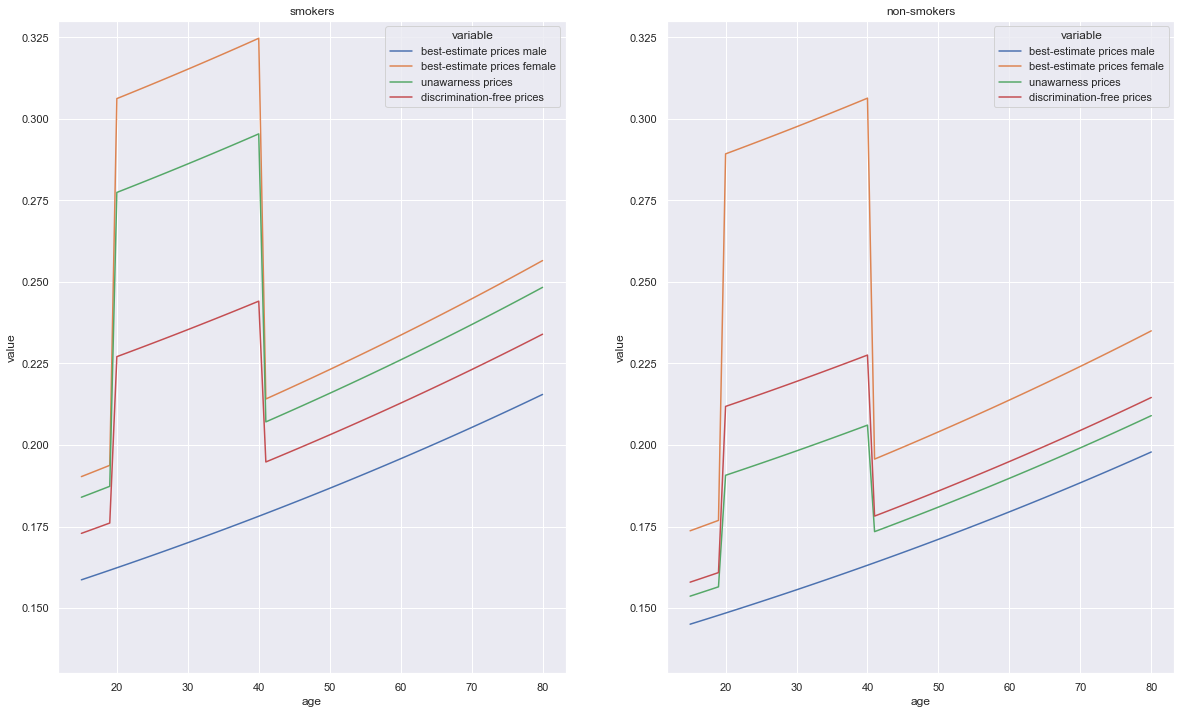

In [ ]:
%matplotlib inline

sns.set(rc={'figure.figsize':(20,12)})

f, axes = plt.subplots(1, 2)


data_preproc_ns = pd.DataFrame({
    'age': age_range, 
    'best-estimate prices male': best_est_m_ns,
    'best-estimate prices female': best_est_f_ns,
    'unawarness prices': unawareness_price_ns,
    'discrimination-free prices': discr_free_price_ns})

data_preproc_s = pd.DataFrame({
    'age': age_range, 
    'best-estimate prices male': best_est_m_s,
    'best-estimate prices female': best_est_f_s,
    'unawarness prices': unawareness_price_s,
    'discrimination-free prices': discr_free_price_s})

plot_1 = sns.lineplot(x='age', y='value', hue='variable', 
             data=pd.melt(data_preproc_s, ['age']), ax = axes[0])
plot_1.set_title('smokers')
plot_1.set(ylim=(0.13, 0.33))

plot_2 = sns.lineplot(x='age', y='value', hue='variable', 
             data=pd.melt(data_preproc_ns, ['age']), ax = axes[1])
plot_2.set_title('non-smokers')
plot_2.set(ylim=(0.13, 0.33))

The following points stand out from the plots:
* for both **smokers** and **non-smokers**, best-estimate prices for males are linearly dependent on age. The best-estimate prices for females are higher because we assigned a higher probability of being female conditionally to having smoking habits. We also observe the effect of birth-related claims between 20 and 40
* since we assumed that **most smokers are female**, the unawareness price for **smokers is close to the best-estimate price for female subjects. The model picked up this pattern, which produces a higher price for females**. The **non-smoker** case shows the opposite behavior, a clear effect of proxy discrimination
* the discrimination-free prices for both **smokers** and **non-smokers** collocate between best-estimate prices for males and females. We notice that discrimination-free prices for smokers are higher than discrimination-free prices for non-smokers.

### 2.4.1 What happens to unawareness prices if we change $P(D=female|X_{2}=smoker)$? <a name="two-four-one"></a>

We change the assumption concerning the conditional probability of $D$ given $X_{2}$; keeping the rest of the other assumptions unchanged, we consider a situation in which most smokers are male subjects:
* $P(D=female)=0.45$
* $P(D=male)=0.55$
* $P(D=female|X_{2}=smoker) = 0.2$.

Furthermore, we assume that $X_{1} \perp (X_{2},D):$
$$P(D=d|\textbf{X}) = \frac{P(D=d,\textbf{X=x})}{P(\textbf{X=x})} = \frac{P(D=d,X_{2} = x_{2})}{P(X_{2} = x_{2})} = P(D=d|X_{2}).$$

Similarly to what is illustrated in section 2.2, we calculate the unawareness prices by marginalizing out the protected feature $D$ (gender) from the best-estimate prices using the conditional distribution $P(D=d|\textbf{X})$. The **unawareness price** for a policyholder **with smoking habits and non-smoking habits** is calculated.

In [ ]:
female_smoker_prob_2 = 0.2
female_nonsmoker_prob_2 = (female_prob - female_smoker_prob_2 * smoker_prob) / (1 - smoker_prob)

In [ ]:
print(f'female given smoker {female_smoker_prob_2}, female given nonsmoker {female_nonsmoker_prob_2}')

female given smoker 0.2, female given nonsmoker 0.5571428571428572


In [ ]:
type1_unaware_s_2 = type1_f_s*female_smoker_prob_2 + type1_m_s*(1-female_smoker_prob_2)
type2_unaware_s_2 = type2_f_s*female_smoker_prob_2 + type2_m_s*(1-female_smoker_prob_2)
type3_unaware_s_2 = type3_f_s*female_smoker_prob_2 + type3_m_s*(1-female_smoker_prob_2)

In [ ]:
unawareness_price_s_2 = 0.5*type1_unaware_s_2 + 0.9*type2_unaware_s_2 + 0.1*type3_unaware_s_2

In [ ]:
type1_unaware_ns_2 = type1_f_ns*female_nonsmoker_prob_2 + type1_m_ns*(1-female_nonsmoker_prob_2)
type2_unaware_ns_2 = type2_f_ns*female_nonsmoker_prob_2 + type2_m_ns*(1-female_nonsmoker_prob_2)
type3_unaware_ns_2 = type3_f_ns*female_nonsmoker_prob_2 + type3_m_ns*(1-female_nonsmoker_prob_2)

In [ ]:
unawareness_price_ns_2 = 0.5*type1_unaware_ns_2 + 0.9*type2_unaware_ns_2 + 0.1*type3_unaware_ns_2

[(0.13, 0.33)]

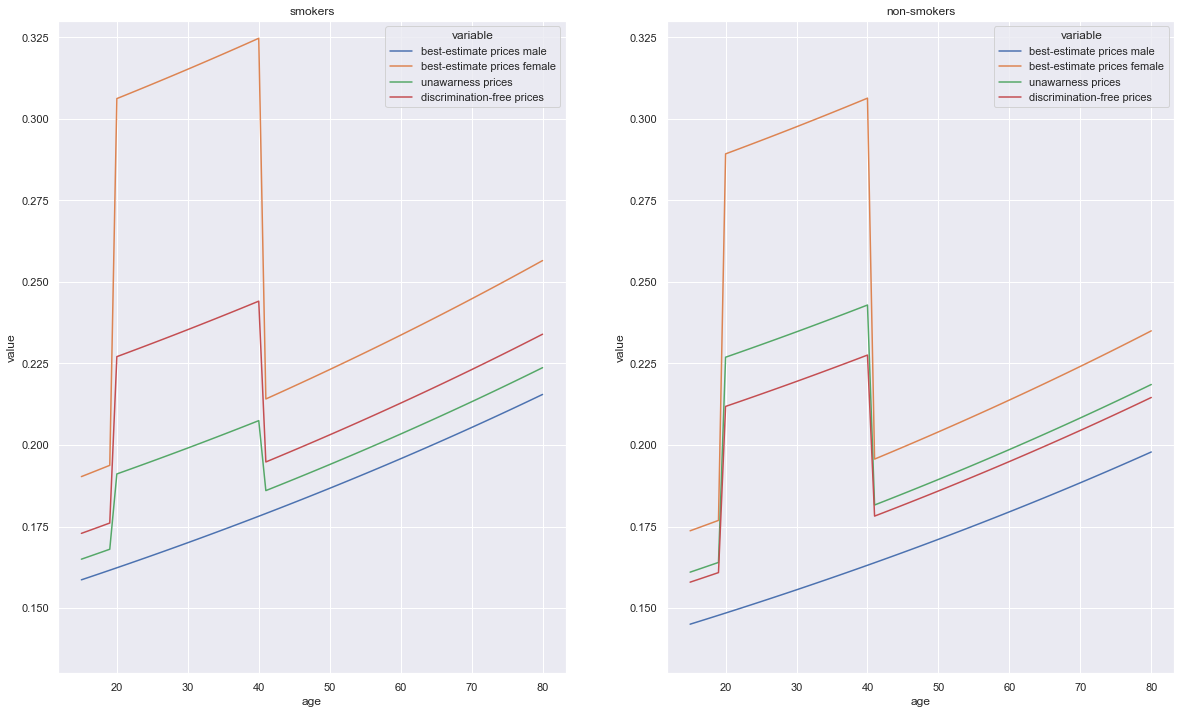

In [ ]:
%matplotlib inline

sns.set(rc={'figure.figsize':(20,12)})

f, axes = plt.subplots(1, 2)


data_preproc_ns = pd.DataFrame({
    'age': age_range, 
    'best-estimate prices male': best_est_m_ns,
    'best-estimate prices female': best_est_f_ns,
    'unawarness prices': unawareness_price_ns_2,
    'discrimination-free prices': discr_free_price_ns})

data_preproc_s = pd.DataFrame({
    'age': age_range, 
    'best-estimate prices male': best_est_m_s,
    'best-estimate prices female': best_est_f_s,
    'unawarness prices': unawareness_price_s_2,
    'discrimination-free prices': discr_free_price_s})

plot_1 = sns.lineplot(x='age', y='value', hue='variable', 
             data=pd.melt(data_preproc_s, ['age']), ax = axes[0])
plot_1.set_title('smokers')
plot_1.set(ylim=(0.13, 0.33))

plot_2 = sns.lineplot(x='age', y='value', hue='variable', 
             data=pd.melt(data_preproc_ns, ['age']), ax = axes[1])
plot_2.set_title('non-smokers')
plot_2.set(ylim=(0.13, 0.33))

The following points stand out from the plots:
* for **smokers**, the unawareness price tracks more closely male subjects while for **non-smokers** it tracks more closely female subjects
* unawareness price would charge more to **non-smokers** rather than to **smokers**.

**Takeaway:** unawarness prices may mask the impact of important variables. In our toy example, the proxy effect causes the model to charge more to the non-smoker category.

# Chapter 3 - A more complicated example - simulating a portfolio of policyholders <a name="three"></a>

## 3.1 Data generation <a name="three-one"></a>

We simulate a dataset from $(\textbf{X},D,Y)\sim P$ consistently with the given model assumptions. Next, we calibrate a regression model to the simulated data. 

We propose the following set of assumptions:
  * health insurance portfolio of size $n=100000$
  * we assume that $P(D=female) = 0.45$, hence female subjects constitute 45% of the portfolio
  * we assume deterministic claim costs $(C_{1}, C_{2}, C_{3} = 0.5, 0.9, 0.1)$
  * we introduce two unprotected features: $X_{1}$ (age) and $X_{2}$ (smoking habits)
  * we introduce one protected feature: $D$ (gender)
  * we assume age being independent from smoking habits and gender $X_{1} \perp (X_{2},D)$
  * we simulate counts from Poisson GLMs assuming $P(D=female|X_{2}=smoker)=0.8$.

In [ ]:
# set seed for reproducibility
random.seed(123)

In [ ]:
# number of policies
n_policies = 100000

In [ ]:
# age pattern
age_pattern = norm.pdf(x = age_range/100, loc = 0.45, scale = 0.2) # Gaussian probability density function
age_prop = age_pattern/sum(age_pattern)

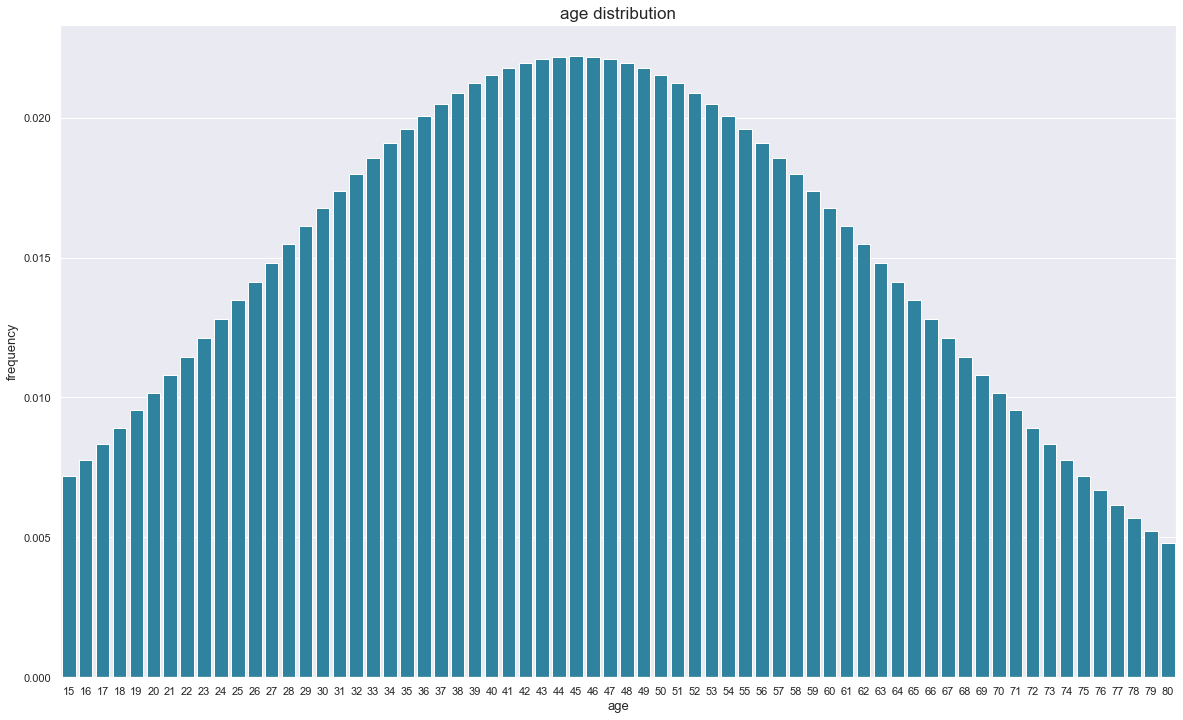

In [ ]:
# KU Leuven colors
#colors = [(29,141,176)]
#colors = [(e[0] / 255.0, e[1] / 255.0, e[2] / 255.0) for e in colors]

data_preproc = pd.DataFrame({
    'age':age_range, 
    'pk' :age_prop})

ax = sns.barplot(x='age', y='pk', data=data_preproc, order=age_range, color = '#1D8DB0')
ax.set_xlabel('age', fontsize = 13)
ax.set_ylabel('frequency', fontsize = 13)
ax.set_title('age distribution', fontsize = 17)
plt.show(ax)

In [ ]:
# the number of female subjects in the portfolio is drawn from a binomial distribution given `n` trials and `p` probability of success:
n_female = int(np.random.binomial(n = n_policies, p = female_prob, size = 1)) # for n floats are also okay but they will be approximated to the closes int
print(f'number of female subjects: {n_female}')

number of female subjects: 44938


In [ ]:
# the number of smoking female subjects in the portfolio is drawn in a similar way, adjusting for the probability of success:
n_female_smoker = int(np.random.binomial(n = n_female, p = female_smoker_prob * smoker_prob / female_prob, size = 1))
print(f'number of female subjects that show smoking habits: {n_female_smoker}')

number of female subjects that show smoking habits: 23809


In [ ]:
# the number of smoking male subjects in the portfolio is drawn in a similar way, adjusting for the probability of success:
n_male_smoker = int(np.random.binomial(n = (n_policies - n_female), p = (1 - female_smoker_prob) * smoker_prob / (1 - female_prob), size = 1))
print(f'number of male subjects that show smoking habits: {n_male_smoker}')

number of male subjects that show smoking habits: 5823


In [ ]:
# compare the empirical frequency for female subjecs vs the theoretical one
female_prob_empirical = n_female/n_policies
print(f'empirical proportion of women in the synthetic population: {female_prob_empirical}, vs theoretical proportion: {female_prob}')

empirical proportion of women in the synthetic population: 0.44938, vs theoretical proportion: 0.45


In [ ]:
# generate an array of zeros of lengh = n_policies
D = np.zeros(n_policies, dtype = np.int32)

# we designate the first n_female entries as female subjects
D[:n_female] = 1

In [ ]:
# generate an array of length n_policies random-sampling with replacement from age_range array according to age_prop sampling probabilities
X_1 = np.random.choice(a = age_range, size = n_policies, replace = True, p = age_prop)

In [ ]:
# generate an array of zeros of lengh = n_policies
X_2 = np.zeros(n_policies, dtype = np.int32)

# we designate the first n_female_smoker entries as smoking female subjects
X_2[:n_female_smoker] = 1

# entries ranging from (n_female + 1) to (n_female + 1 + n_male_smoker) are designated as smoking male subjects
X_2[(n_female + 1):(n_female + 1 + n_male_smoker)] = 1

In [ ]:
len(list(range((n_female + 1),(n_female + 1 + n_male_smoker))))

5823

In [ ]:
# generate boolean array: True when age is in [20, 40], else False
pregnant_age = (X_1 >= 20) & (X_1 <= 40)

In [ ]:
# arrage arrays X_1, X_2, D and pregnant_age in a pd.DataFrame
data_sim = pd.DataFrame({'gender':D,
                         'smoker':X_2,
                         'age':X_1,
                         'pregnant_age':pregnant_age}); data_sim.head(10)

,gender,smoker,age,pregnant_age
0,1,1,62,False
1,1,1,49,False
2,1,1,40,True
3,1,1,41,False
4,1,1,68,False
5,1,1,37,True
6,1,1,16,False
7,1,1,49,False
8,1,1,42,False
9,1,1,62,False


In [ ]:
# create a backup of the copy
data_sim_backup = data_sim.copy(deep = True) # not a shallow copy

We now generate the log-frequencies for the different claim types. We assumed that claim counts follow independent Poisson GLM with canonical link function.

* Simulate type 1 claims $$\log{\lambda_{1}(\textbf{X},D)}:=\alpha_{0}+\alpha_{1}1_{X_1\in[20,40]}1_{D=woman}$$

In [ ]:
claims_1 = np.random.poisson(np.exp(-40+38.5*data_sim.pregnant_age*data_sim.gender))

* Simulate type 2 claims $$\log{\lambda_{2}(\textbf{X},D)}:=\beta_{0}+\beta_{1}X_{1}+\beta_{2}1_{X_2=smoker} + \beta_{3}1_{D=woman}$$

In [ ]:
claims_2 = np.random.poisson(np.exp(-2+0.004*data_sim.age+0.1*data_sim.smoker+0.2*data_sim.gender))

* Simulate type 3 claims $$\log{\lambda_{3}(\textbf{X},D)}:=\gamma_{0}+\gamma_{1}X_{1}$$

In [ ]:
claims_3 = np.random.poisson(np.exp(-2 + 0.01*data_sim.age))

## 3.2 Fitting a Poisson GLM to individual claim types <a name="three-two"></a>

Our goal is to fit a regression model to the simulated data assuming that the different claim types are independent and Poisson distributed. The independence assumption between the claim counts motivates modeling them separately. Therefore, we fit three different regression models, one per claim type, ignoring the information about the data generating process of the log-frequencies above.

In [ ]:
# import core packages to fit Poisson GLM
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
# we create a separate pd.DataFrame and we store type 1 claims and X_1, X_2, D 
df_1 = pd.DataFrame({'claims_1':claims_1,
                   'age':data_sim.age,
                   'smoker':data_sim.smoker,
                   'gender':data_sim.gender})

In [ ]:
# we fit a Poisson GLM on type 1 claims using all the available information
glm_type_1 = smf.glm(formula='claims_1 ~ 1 + age + smoker + gender',  # intersect included
                     data = df_1, family= sm.families.Poisson()).fit()
est_freq_1 = glm_type_1.fittedvalues
print(glm_type_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               claims_1   No. Observations:               100000
Model:                            GLM   Df Residuals:                    99996
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11097.
Date:                Tue, 07 Jun 2022   Deviance:                       15696.
Time:                        10:53:29   Pearson chi2:                 3.42e+04
No. Iterations:                    28   Pseudo R-squ. (CS):            0.08507
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.7911   1.74e+04     -0.002      0.9

In [ ]:
glm_type_1.predict().shape

(100000,)

In [ ]:
np.mean((df_1['claims_1'] - glm_type_1.predict())**2)

0.039589464536861886

In [ ]:
# we create a separate pd.DataFrame and we store type 2 claims and X_1, X_2, D 
df_2 = pd.DataFrame({'claims_2':claims_2,
                   'age':data_sim.age,
                   'smoker':data_sim.smoker,
                   'gender':data_sim.gender})

In [ ]:
# we fit a Poisson GLM on type 2 claims using all the available information
glm_type_2 = smf.glm(formula='claims_2 ~ 1 + age + smoker + gender',  # intersect included
                     data = df_2, family= sm.families.Poisson()).fit()
est_freq_2 = glm_type_2.fittedvalues
print(glm_type_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               claims_2   No. Observations:               100000
Model:                            GLM   Df Residuals:                    99996
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -51191.
Date:                Tue, 07 Jun 2022   Deviance:                       67176.
Time:                        10:53:29   Pearson chi2:                 1.00e+05
No. Iterations:                     6   Pseudo R-squ. (CS):           0.004596
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9868      0.024    -82.377      0.0

In [ ]:
# we create a separate pd.DataFrame and we store type 3 claims and X_1, X_2, D 
df_3 = pd.DataFrame({'claims_3':claims_3,
                   'age':data_sim.age,
                   'smoker':data_sim.smoker,
                   'gender':data_sim.gender})

In [ ]:
# we fit a Poisson GLM on type 3 claims using all the available information
glm_type_3 = smf.glm(formula='claims_3 ~ 1 + age + smoker + gender', # intersect included
                     data = df_2, family= sm.families.Poisson()).fit()
est_freq_3 = glm_type_3.fittedvalues
print(glm_type_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               claims_3   No. Observations:               100000
Model:                            GLM   Df Residuals:                    99996
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -56518.
Date:                Tue, 07 Jun 2022   Deviance:                       72545.
Time:                        10:53:30   Pearson chi2:                 1.00e+05
No. Iterations:                     6   Pseudo R-squ. (CS):           0.006124
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0103      0.023    -88.395      0.0

In [ ]:
# we concatenate data_sim with the fitted values for all claim types
data_sim_fitted = pd.concat([data_sim, est_freq_1, est_freq_2, est_freq_3], axis = 1)
data_sim_fitted = data_sim_fitted.rename(columns={0:'claims_1',1:'claims_2',2:'claims_3'}); data_sim_fitted.head()

,gender,smoker,age,pregnant_age,claims_1,claims_2,claims_3
0,1,1,62,False,0.014492,0.240991,0.250764
1,1,1,49,False,0.035810,0.229876,0.218653
2,1,1,40,True,0.066987,0.222483,0.198864
3,1,1,41,False,0.062485,0.223292,0.200971
4,1,1,68,False,0.009546,0.246301,0.267135


In [ ]:
# for convenience, let's change the label: 
#1 -> female, 0 -> male
data_sim_fitted['gender'] = np.where(data_sim_fitted['gender'].astype(int) == 1, 'female', 'male')

#1 -> smoker, 0 -> non-smoker
data_sim_fitted['smoker'] = np.where(data_sim_fitted['smoker'].astype(int) == 1, 'smoker', 'non-smoker')

In [ ]:
data_sim_fitted.head()

,gender,smoker,age,pregnant_age,claims_1,claims_2,claims_3
0,female,smoker,62,False,0.014492,0.240991,0.250764
1,female,smoker,49,False,0.035810,0.229876,0.218653
2,female,smoker,40,True,0.066987,0.222483,0.198864
3,female,smoker,41,False,0.062485,0.223292,0.200971
4,female,smoker,68,False,0.009546,0.246301,0.267135


Text(0.5, 1.0, 'claim_type_3')

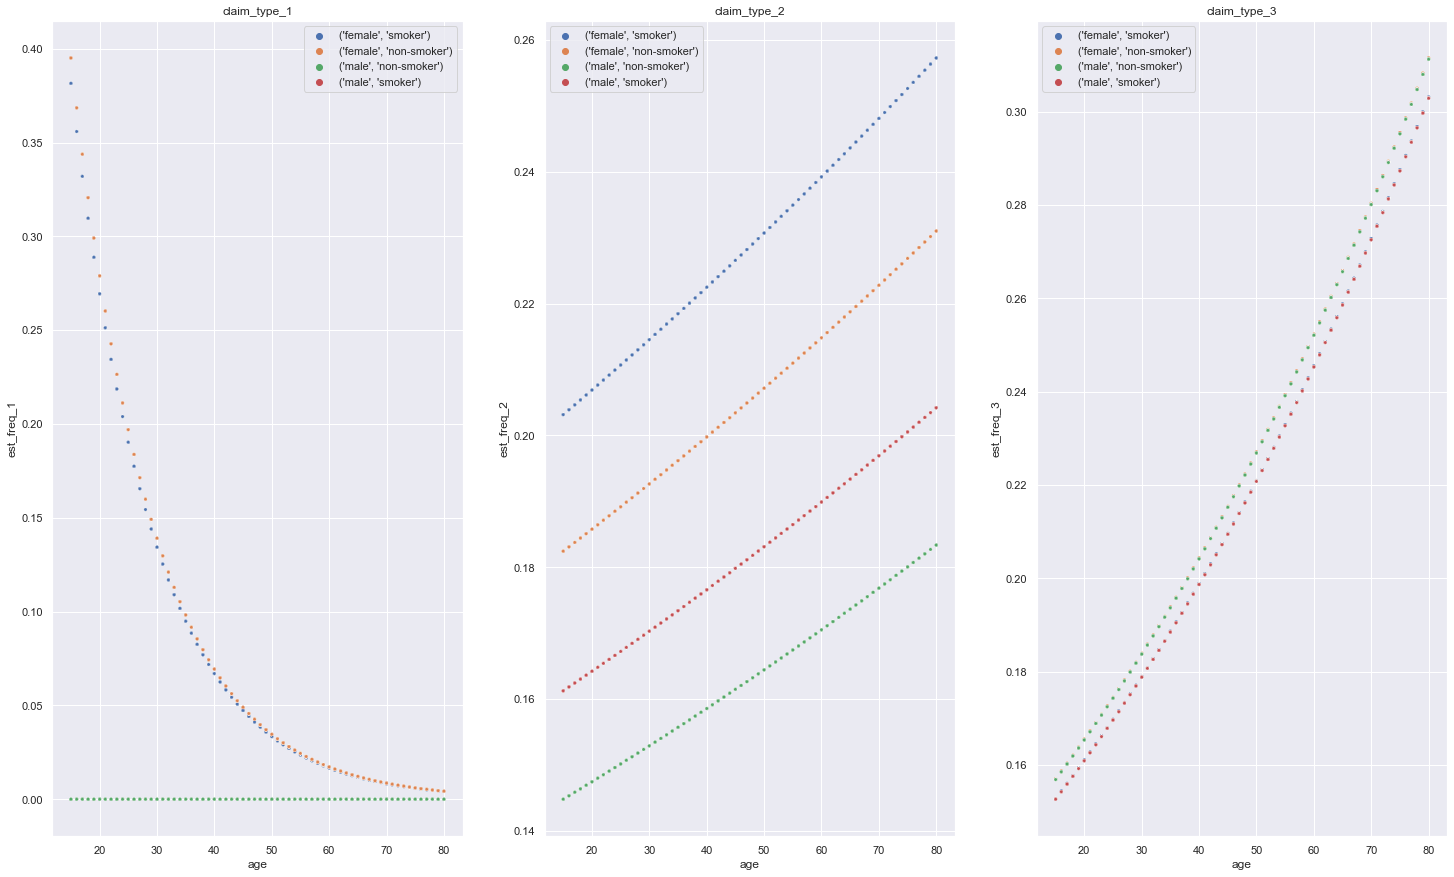

In [ ]:
%matplotlib inline 

sns.set(rc={'figure.figsize':(25,15)})

f, axes = plt.subplots(1, 3)

df_pre_1 = pd.DataFrame({
    'age': data_sim_fitted.age,
    'gender': data_sim_fitted.gender,
    'smoker': data_sim_fitted.smoker,
    'est_freq_1': est_freq_1})

df_pre_2 = pd.DataFrame({
    'age': data_sim_fitted.age,
    'gender': data_sim_fitted.gender,
    'smoker': data_sim_fitted.smoker,
    'est_freq_2': est_freq_2})

df_pre_3 = pd.DataFrame({
    'age': data_sim_fitted.age,
    'gender': data_sim_fitted.gender,
    'smoker': data_sim_fitted.smoker,
    'est_freq_3': est_freq_3})

# notice the trick we use in hue: we need to build a sequence that we pass via hue parameter. The requirement here is that
# the argument in hue has the same length as the data and must be one dimensional, so we can't use df[['column1','column2']],
# we have to concatenate columns into one. Solution is to concatenate as tuple or series of strings.
plot_1 = sns.scatterplot(x = 'age', y = 'est_freq_1', hue = df_pre_1[['gender', 'smoker']].apply(tuple, axis=1), # hue defines which column should be used for column encoding
             data = df_pre_1, ax = axes[0], s = 10)
plot_1.set_title('claim_type_1')

plot_2 = sns.scatterplot(x = 'age', y = 'est_freq_2', hue = df_pre_2[['gender', 'smoker']].apply(tuple, axis=1), 
         data = df_pre_2, ax = axes[1], s = 10)
plot_2.set_title('claim_type_2')

plot_3 = sns.scatterplot(x = 'age', y = 'est_freq_3', hue = df_pre_3[['gender', 'smoker']].apply(tuple, axis=1), 
         data = df_pre_3, ax = axes[2], s = 10)
plot_3.set_title('claim_type_3')

The following plots show the frequency for each claim type:
* the plot on the left side illustrates claim type 1, which only affects female subjects between 20 and 40 years. We see that Poisson GLM struggles to fit the highly non-linear effect
* the plot in the center illustrates claim type 2. We observe that it is linearly dependent on age and that, in general, we expect a higher frequency for smoking subjects 
* the plot on the right side illustrates claim type 3, in which frequency is uniquely linearly dependent on age.

## 3.3 Estimation of technical prices <a name="three-three"></a>

Let's recall that the claim costs are assumed to be deterministic and given by $(C_{1}, C_{2}, C_{3} = 0.5, 0.9, 0.1)$. We are going to estimate:
* best-estimate prices, obtained using all the available information $X_{1}$, $X_{2}$ and $D$, hence including protected features
* unawareness prices, obtained using only the unprotected features $X_{1}$ and $X_{2}$
* discrimination-free prices, obtained averaging out the protected feature $D$ from best-estimate prices.

### 3.3.1 Best-estimate prices <a name="three-three-one"></a>

In [ ]:
# fitting Poisson GLM on the claim frequency of types 1,2 and 3 using all available information (including protected feature gender)
glm_type_1 = smf.glm(formula='claims_1 ~ 1 + age + smoker + gender', 
                     data = df_1, family= sm.families.Poisson()).fit()
est_freq_1 = glm_type_1.fittedvalues

glm_type_2 = smf.glm(formula='claims_2 ~ 1 + age + smoker + gender', 
                     data = df_2, family= sm.families.Poisson()).fit()
est_freq_2 = glm_type_2.fittedvalues

glm_type_3 = smf.glm(formula='claims_3 ~ 1 + age + smoker + gender', 
                     data = df_3, family= sm.families.Poisson()).fit()
est_freq_3 = glm_type_3.fittedvalues

# calculating best-estimate prices multiplying claim costs and claim frequency per each claim type
best_est_price_glm = 0.5*est_freq_1 + 0.9*est_freq_2 + 0.1*est_freq_3

### 3.3.2 Unawareness prices <a name="three-three-two"></a>

In [ ]:
# fitting Poisson GLM on the claim frequency of types 1,2 and 3 using only unprotected available information (age and smoking habits)
glm_type_1_unaware = smf.glm(formula='claims_1 ~ 1 + age + smoker', 
                     data = df_1, family= sm.families.Poisson()).fit()

est_freq_1_unaware = glm_type_1_unaware.fittedvalues

glm_type_2_unaware = smf.glm(formula='claims_2 ~ 1 + age + smoker', 
                     data = df_2, family= sm.families.Poisson()).fit()

est_freq_2_unaware = glm_type_2_unaware.fittedvalues

glm_type_3_unaware = smf.glm(formula='claims_3 ~ 1 + age + smoker', 
                     data = df_3, family= sm.families.Poisson()).fit()

est_freq_3_unaware = glm_type_3_unaware.fittedvalues

# calculating best-estimate prices multiplying claim costs and claim frequency per each claim type
unaware_price_glm = 0.5*est_freq_1_unaware + 0.9*est_freq_2_unaware + 0.1*est_freq_3_unaware

### 3.3.3 Discrimination-free prices <a name="three-three-three"></a>

In [ ]:
data_sim_fitted.rename(columns={0:'claims_1',1:'claims_2',2:'claims_3'}, inplace = True)

In [ ]:
data_sim_full_female = data_sim_fitted.copy(deep = True)
data_sim_full_female.gender = 1 #'female'
data_sim_full_female['smoker'] = np.where((data_sim_full_female['smoker'] == 'smoker'),1,0) 

In [ ]:
data_sim_full_female['smoker'].sum()

29632

In [ ]:
data_sim_full_female

,gender,smoker,age,pregnant_age,claims_1,claims_2,claims_3
0,1,1,62,False,1.449241e-02,0.240991,0.250764
1,1,1,49,False,3.581031e-02,0.229876,0.218653
2,1,1,40,True,6.698742e-02,0.222483,0.198864
3,1,1,41,False,6.248456e-02,0.223292,0.200971
4,1,1,68,False,9.545907e-03,0.246301,0.267135
...,...,...,...,...,...,...,...
99995,1,0,41,False,1.807798e-14,0.159152,0.206350
99996,1,0,68,False,2.761814e-15,0.175551,0.274285
99997,1,0,43,False,1.572928e-14,0.160312,0.210746
99998,1,0,58,False,5.538602e-15,0.169289,0.246845


In [ ]:
data_sim_full_male = data_sim_fitted.copy(deep = True)
data_sim_full_male.gender = 0 #'male'
data_sim_full_male['smoker'] = np.where((data_sim_full_male['smoker'] == 'smoker'),1,0) 

In [ ]:
data_sim_full_male['smoker'].sum()

29632

In [ ]:
best_est_price_glm_full_female =  0.5*glm_type_1.predict(data_sim_full_female[['age','smoker','gender']]) + \
                                  0.9*glm_type_2.predict(data_sim_full_female[['age','smoker','gender']]) + \
                                  0.1*glm_type_3.predict(data_sim_full_female[['age','smoker','gender']])

In [ ]:
best_est_price_glm_full_male =   0.5*glm_type_1.predict(data_sim_full_male[['age','smoker','gender']]) + \
                                  0.9*glm_type_2.predict(data_sim_full_male[['age','smoker','gender']]) + \
                                  0.1*glm_type_3.predict(data_sim_full_male[['age','smoker','gender']])

In [ ]:
discr_free_price_glm = female_prob_empirical * best_est_price_glm_full_female + (1 - female_prob_empirical) * best_est_price_glm_full_male

## 3.4 Aggregate results and plot <a name="three-four"></a>

In [ ]:
prices_agg = pd.concat([data_sim_fitted, pd.Series(best_est_price_glm), 
                        pd.Series(unaware_price_glm), pd.Series(discr_free_price_glm)], axis = 1)
prices_agg.columns = ['gender','smoker','age','pregnant_age',
                      'est_freq_1','est_freq_2','est_freq_3',
                      'best_est_price_glm','unaware_price_glm','discr_free_price_glm']
prices_agg.head()

,gender,smoker,age,pregnant_age,est_freq_1,est_freq_2,est_freq_3,best_est_price_glm,unaware_price_glm,discr_free_price_glm
0,female,smoker,62,False,0.014492,0.240991,0.250764,0.249215,0.238924,0.220613
1,female,smoker,49,False,0.035810,0.229876,0.218653,0.246659,0.234738,0.213332
2,female,smoker,40,True,0.066987,0.222483,0.198864,0.253614,0.238975,0.212469
3,female,smoker,41,False,0.062485,0.223292,0.200971,0.252302,0.238064,0.212313
4,female,smoker,68,False,0.009546,0.246301,0.267135,0.253157,0.243137,0.225374


In [ ]:
prices_agg['best-estimate price female (glm)'] = prices_agg[prices_agg.gender == 'female'].best_est_price_glm
prices_agg['best-estimate price male (glm)'] = prices_agg[prices_agg.gender == 'male'].best_est_price_glm
prices_agg = prices_agg.drop(columns=['best_est_price_glm'],axis = 1)
prices_agg = prices_agg.rename(columns={'unaware_price_glm':'unawareness prices (glm)',
                                'discr_free_price_glm':'discrimination-free prices (glm)'})

Text(0.5, 1.0, 'non-smokers')

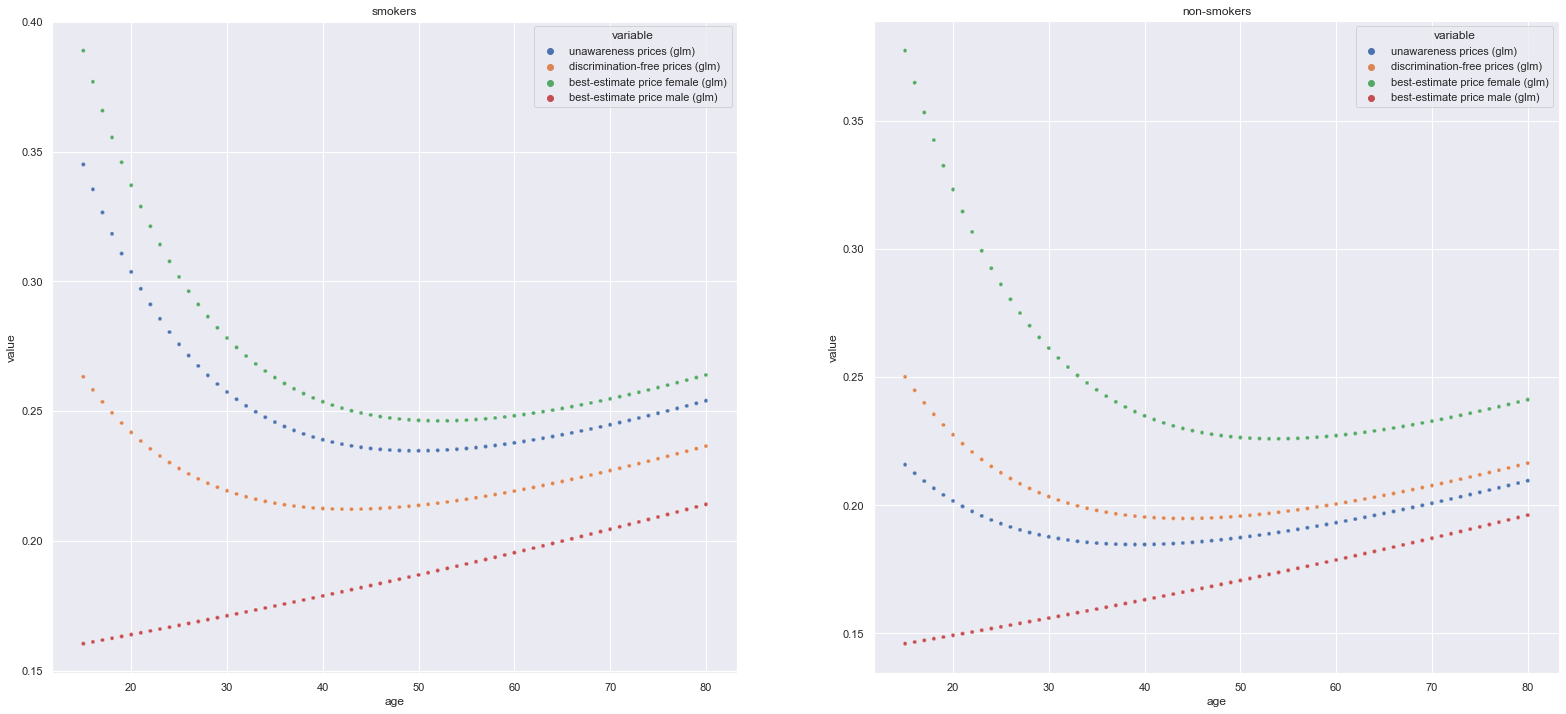

In [ ]:
%matplotlib inline 

sns.set(rc={'figure.figsize':(27,12)})
f, axes = plt.subplots(1, 2)

df_smok = prices_agg[prices_agg.smoker == 'smoker']
df_smok = df_smok.drop(['smoker','gender','pregnant_age','est_freq_1','est_freq_2','est_freq_3'], axis = 1)

df_nnsmok = prices_agg[prices_agg.smoker != 'smoker']
df_nnsmok = df_nnsmok.drop(['smoker','gender','pregnant_age','est_freq_1','est_freq_2','est_freq_3'], axis = 1)

plot_1 = sns.scatterplot(x='age', y='value', hue='variable', 
             data=pd.melt(df_smok, ['age']), ax = axes[0], s=15)
plot_1.set_title('smokers')

plot_2 = sns.scatterplot(x='age', y='value', hue='variable', 
         data=pd.melt(df_nnsmok, ['age']), ax = axes[1], s=15)
plot_2.set_title('non-smokers')

The plot above shows the resulting best-estimate prices, unawareness prices, and discrimination-free prices, as estimated using the Poisson GLM. We can observe that the resulting prices are a poor approximation to the true prices of the previous chapter, where we assumed full knowledge of the data generating process. However, the general discriminatory behavior is the same:
* the unawareness price discriminates indirectly by learning the gender $D$ from smoking habits $X_{2}$
* discrimination-free prices are higher for smokers rather than non-smokers.

# Chapter 4 - Conclusions <a name="four"></a>

We can draw the following conclusions:
* if we want to avoid discrimination in insurance pricing, we need access to all discriminatory characteristics. It is impossible to properly adjust for the protected characteristics' influence without accounting for protected features. Therefore, we first construct a price based on all the available information, including the discriminatory ones. Second, we average out the effect of discriminatory information
* the approach described in [Lindholm et al. (2022)](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/ED25C4053690E56050F437B8DF2AD117/S0515036121000234a.pdf/discrimination-free-insurance-pricing.pdf) neither allows for direct nor for indirect discrimination
* omission of protected risk factors leads to indirect discrimination in prices.

# References <a name="ref"></a>

Lindholm, M., Richman, R., Tsanakas, A., & Wüthrich, M. (2022). Discrimination-Free Insurance Pricing. ASTIN Bulletin, 52(1), 55-89. doi:10.1017/asb.2021.23.

Ninareh Mehrabi, Fred Morstatter, Nripsuta Saxena, Kristina Lerman, and Aram Galstyan. (2021). A Survey on Bias and Fairness in Machine Learning. ACM Comput. Surv. 54, 6, Article 115 (July 2022), 35 pages. doi:10.1145/3457607.


Xin, Xi and Huang, Fei. Anti-Discrimination Insurance Pricing: Regulations, Fairness Criteria, and Models. (2022). doi:10.2139/ssrn.3850420.

Dwork, Cynthia, Moritz Hardt, Toniann Pitassi, Omer Reingold, and Richard Zemel (2012). Fairness through awareness. In: Proceedings of the 3rd innovations in theoretical computer science conference, pp. 214-226.

Zemel, Rich, Yu Wu, Kevin Swersky, Toni Pitassi, and Cynthia Dwork (2013). Learning fair representations. In: International conference on machine learning. PMLR, pp. 325-333.

Matt Kusner, Joshua Loftus, Chris Russell, and Ricardo Silva. (2017). Counterfactual fairness. In Proceedings of the 31st International Conference on Neural Information Processing Systems (NIPS'17). Curran Associates Inc., Red Hook, NY, USA, 4069–4079.

Kranzberg, M. (1986). Technology and History: “Kranzberg’s Laws.” Technology and Culture, 27(3), 544–560. doi:10.2307/3105385.